# NYC 311 service requests & COVID-19
## Hypotheses- How has COVID-19 influenced 311 complaints in NYC?

**NYC Open Data: 311 Service Requests**

*   311 is a non-emergency phone number that allows callers to report problems, access municipal services, and request information
*   Dataset is automatically updated daily, was made public in Oct 2011
*   Each row is a 311-service request
*   Dataset has 25 million rows and 41 columns
*   In total, 13,988,849 KB in size 

*   Link: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

# Install sodapy and import data

In [0]:
pip install --upgrade pip


Python interpreter will be restarted.
Collecting pip
 Downloading pip-21.1.1-py3-none-any.whl (1.5 MB)
Installing collected packages: pip
 Attempting uninstall: pip
 Found existing installation: pip 20.2.4
 Uninstalling pip-20.2.4:
 Successfully uninstalled pip-20.2.4
Successfully installed pip-21.1.1
Python interpreter will be restarted.

In [0]:
!pip install sodapy
!pip install pillow
!pip install wordcloud
!pip install missingno

Collecting sodapy
 Downloading sodapy-2.1.0-py2.py3-none-any.whl (14 kB)
Requirement already satisfied: requests>=2.20.0 in /databricks/python3/lib/python3.8/site-packages (from sodapy) (2.24.0)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.20.0->sodapy) (2.10)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.20.0->sodapy) (2020.12.5)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.20.0->sodapy) (3.0.4)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.20.0->sodapy) (1.25.11)
Installing collected packages: sodapy
Successfully installed sodapy-2.1.0
Collecting pillow
 Downloading Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl (3.0 MB)
 | 10 kB 18.7 MB/s eta 0:00:01 |▏ | 20 kB 24.4 MB/s eta 0:00:01 |▎ | 30 kB 13.4 MB/s eta 0:00:01 |▍ | 40 kB 10.2 MB/s eta 0:00:01 |▌ | 51 kB 8.3 MB/s eta 0:00:01 |▋ | 61 kB 7.2 MB/s eta 0:00:01 |▊ | 71 kB 7.9 MB/s eta 0:00:01 |▉ | 81 kB 8.0 MB/s eta 0:00:01 |█ | 92 kB 7.0 MB/s eta 0:00:01 |█ | 102 kB 6.9 MB/s eta 0:00:01 |█▏ | 112 kB 6.9 MB/s eta 0:00:01 |█▎ | 122 kB 6.9 MB/s eta 0:00:01 |█▍ | 133 kB 6.9 MB/s eta 0:00:01 |█▌ | 143 kB 6.9 MB/s eta 0:00:01 |█▋ | 153 kB 6.9 MB/s eta 0:00:01 |█▊ | 163 kB 6.9 MB/s eta 0:00:01 |█▉ | 174 kB 6.9 MB/s eta 0:00:01 |██ | 184 kB 6.9 MB/s eta 0:00:01 |██ | 194 kB 6.9 MB/s eta 0:00:01 |██▏ | 204 kB 6.9 MB/s eta 0:00:01 |██▎ | 215 kB 6.9 MB/s eta 0:00:01 |██▍ | 225 kB 6.9 MB/s eta 0:00:01 |██▌ | 235 kB 6.9 MB/s eta 0:00:01 |██▋ | 245 kB 6.9 MB/s eta 0:00:01 |██▊ | 256 kB 6.9 MB/s eta 0:00:01 |██▉ | 266 kB 6.9 MB/s eta 0:00:01 |███ | 276 kB 6.9 MB/s eta 0:00:01 |███ | 286 kB 6.9 MB/s eta 0:00:01 |███▏ | 296 kB 6.9 MB/s eta 0:00:01 |███▎ | 307 kB 6.9 MB/s eta 0:00:01 |███▍ | 317 kB 6.9 MB/s eta 0:00:01 |███▌ | 327 kB 6.9 MB/s eta 0:00:01 |███▋ | 337 kB 6.9 MB/s eta 0:00:01 |███▊ | 348 kB 6.9 MB/s eta 0:00:01 |███▉ | 358 kB 6.9 MB/s eta 0:00:01 |████ | 368 kB 6.9 MB/s eta 0:00:01 |████ | 378 kB 6.9 MB/s eta 0:00:01 |████▏ | 389 kB 6.9 MB/s eta 0:00:01 |████▎ | 399 kB 6.9 MB/s eta 0:00:01 |████▍ | 409 kB 6.9 MB/s eta 0:00:01 |████▌ | 419 kB 6.9 MB/s eta 0:00:01 |████▋ | 430 kB 6.9 MB/s eta 0:00:01 |████▊ | 440 kB 6.9 MB/s eta 0:00:01 |████▉ | 450 kB 6.9 MB/s eta 0:00:01 |█████ | 460 kB 6.9 MB/s eta 0:00:01 |█████ | 471 kB 6.9 MB/s eta 0:00:01 |█████▏ | 481 kB 6.9 MB/s eta 0:00:01 |█████▎ | 491 kB 6.9 MB/s eta 0:00:01 |█████▍ | 501 kB 6.9 MB/s eta 0:00:01 |█████▌ | 512 kB 6.9 MB/s eta 0:00:01 |█████▋ | 522 kB 6.9 MB/s eta 0:00:01 |█████▊ | 532 kB 6.9 MB/s eta 0:00:01 |█████▉ | 542 kB 6.9 MB/s eta 0:00:01 |██████ | 552 kB 6.9 MB/s eta 0:00:01 |██████ | 563 kB 6.9 MB/s eta 0:00:01 |██████▏ | 573 kB 6.9 MB/s eta 0:00:01 |██████▎ | 583 kB 6.9 MB/s eta 0:00:01 |██████▍ | 593 kB 6.9 MB/s eta 0:00:01 |██████▌ | 604 kB 6.9 MB/s eta 0:00:01 |██████▋ | 614 kB 6.9 MB/s eta 0:00:01 |██████▊ | 624 kB 6.9 MB/s eta 0:00:01 |██████▉ | 634 kB 6.9 MB/s eta 0:00:01 |███████ | 645 kB 6.9 MB/s eta 0:00:01 |███████ | 655 kB 6.9 MB/s eta 0:00:01 |███████▏ | 665 kB 6.9 MB/s eta 0:00:01 |███████▎ | 675 kB 6.9 MB/s eta 0:00:01 |███████▍ | 686 kB 6.9 MB/s eta 0:00:01 |███████▌ | 696 kB 6.9 MB/s eta 0:00:01 |███████▋ | 706 kB 6.9 MB/s eta 0:00:01 |███████▊ | 716 kB 6.9 MB/s eta 0:00:01 |███████▉ | 727 kB 6.9 MB/s eta 0:00:01 |████████ | 737 kB 6.9 MB/s eta 0:00:01 |████████ | 747 kB 6.9 MB/s eta 0:00:01 |████████▏ | 757 kB 6.9 MB/s eta 0:00:01 |████████▎ | 768 kB 6.9 MB/s eta 0:00:01 |████████▍ | 778 kB 6.9 MB/s eta 0:00:01 |████████▌ | 788 kB 6.9 MB/s eta 0:00:01 |████████▋ | 798 kB 6.9 MB/s eta 0:00:01 |████████▊ | 808 kB 6.9 MB/s eta 0:00:01 |████████▉ | 819 kB 6.9 MB/s eta 0:00:01 |█████████ | 829 kB 6.9 MB/s et

In [0]:
#Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%%time

from sodapy import Socrata
import pandas as pd

client = Socrata("data.cityofnewyork.us", None)
# Set the timeout in seconds
client.timeout = 360
#https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

results = client.get("erm2-nwe9", 
                     select="unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type",
                     order="created_date DESC", where="created_date > '2020' AND created_date < '2021' AND status = 'Closed'", limit=3000000
                     )
df = pd.DataFrame.from_records(results)

WARNING:root:Requests made without an app_token will be subject to strict throttling limits.
CPU times: user 18.3 s, sys: 3.28 s, total: 21.6 s
Wall time: 1min 28s

# Exploratory Analysis

In [0]:
# Check to make sure the data we pulled is within the right size limit for the project
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482841 entries, 0 to 2482840
Data columns (total 9 columns):
 # Column Dtype 
--- ------ ----- 
 0 unique_key object
 1 created_date object
 2 closed_date object
 3 agency object
 4 complaint_type object
 5 descriptor object
 6 status object
 7 borough object
 8 Open_Data_Channel_Type object
dtypes: object(9)
memory usage: 1.4 GB

Project requirement is > 500 MB. 1.4 GB = 1400 MB

In [0]:
# How many rows and columns?
print(df.shape)

(2482841, 9)

In [0]:
# Descriptive statistics of the data
df.describe()

Out[9]:

,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type
count,2482841,2482841,2482839,2482841,2482841,2479654,2482841,2460824,2482841
unique,2482841,2079326,1752824,16,173,852,1,6,5
top,47388743,2020-08-31T12:00:00.000,2020-08-04T12:00:00.000,NYPD,Noise - Residential,Loud Music/Party,Closed,BROOKLYN,ONLINE
freq,1,162,1202,1269236,407045,511356,2482841,701169,882855


In [0]:
# Column names
df.columns

Out[10]: Index(['unique_key', 'created_date', 'closed_date', 'agency', 'complaint_type',
 'descriptor', 'status', 'borough', 'Open_Data_Channel_Type'],
 dtype='object')

In [0]:
# Sample the data
df.sample(10)

Out[5]:

,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type
944220,47323905,2020-08-22T19:54:00.000,2020-08-24T09:45:00.000,DOT,Street Light Condition,Street Light Out,Closed,BRONX,UNKNOWN
1524382,46570963,2020-06-21T22:21:53.000,2020-06-21T22:25:07.000,NYPD,Illegal Fireworks,N/A,Closed,BROOKLYN,ONLINE
326409,48116681,2020-11-10T18:56:27.000,2020-11-10T22:17:10.000,NYPD,Noise - Residential,Loud Music/Party,Closed,BROOKLYN,ONLINE
889804,47402493,2020-08-29T17:22:42.000,2020-08-29T17:49:07.000,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Closed,BRONX,ONLINE
701019,47634214,2020-09-21T00:38:53.000,2020-09-21T02:31:24.000,NYPD,Illegal Parking,Blocked Sidewalk,Closed,BRONX,MOBILE
1278265,46889698,2020-07-17T17:47:10.000,2020-10-22T17:01:29.000,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,NonCompliance with Phased Reopening,Business not in compliance,Closed,MANHATTAN,ONLINE
217917,48264495,2020-11-27T12:21:49.000,2020-12-16T08:40:17.000,HPD,PLUMBING,BASIN/SINK,Closed,BROOKLYN,PHONE
1398186,46734936,2020-07-04T09:43:06.000,2020-07-08T00:00:00.000,DOB,Elevator,Elevator - Multiple Devices On Property,Closed,BRONX,UNKNOWN
1560177,46548014,2020-06-19T08:10:00.000,2020-08-31T12:00:00.000,DSNY,Dirty Conditions,E3 Dirty Sidewalk,Closed,BROOKLYN,ONLINE
805921,47499957,2020-09-08T18:13:44.000,2020-09-08T19:09:53.000,NYPD,Noise - Residential,Banging/Pounding,Closed,BRONX,ONLINE


In [0]:
# First and last day of data we have
df[['created_date', 'closed_date']] = df[['created_date', 'closed_date']].apply(pd.to_datetime)

print('Initial_Retrieved_date:',df['created_date'].max())
print('Final_Retrieved_date:',df['closed_date'].min())

Initial_Retrieved_date: 2020-12-31 23:59:55
Final_Retrieved_date: 2020-01-01 00:03:35

**Complaint_type** is the fist level of a hierarchy identifying the topic of the incident or condition. Complaint Type *may* have a corresponding **Descriptor** or may stand alone.

In [0]:
# Look at null values
df.isna().sum()

Out[12]: unique_key 0
created_date 0
closed_date 2
agency 0
complaint_type 0
descriptor 3187
status 0
borough 22017
Open_Data_Channel_Type 0
dtype: int64

In [0]:
# Looking at the null values
null_data = df[df.isnull().any(axis=1)]
null_data.sample(10)

Out[13]:

,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type
327195,48120147,2020-11-10T16:31:00.000,2020-11-10T16:31:00.000,DOT,Street Light Condition,Street Light Out,Closed,NaN,UNKNOWN
743771,47583464,2020-09-16T08:30:00.000,2020-09-16T08:30:00.000,DOT,Street Light Condition,Street Light Out,Closed,NaN,UNKNOWN
1962633,46005294,2020-04-15T14:01:00.000,2020-04-16T00:51:00.000,DOT,Traffic Signal Condition,LED Lense,Closed,NaN,UNKNOWN
1092201,47137436,2020-08-06T08:32:00.000,2020-08-06T09:35:00.000,DOT,Traffic Signal Condition,Controller,Closed,NaN,UNKNOWN
88925,48436478,2020-12-17T05:31:00.000,2020-12-17T07:05:00.000,DOT,Traffic Signal Condition,Controller,Closed,NaN,UNKNOWN
75067,48451123,2020-12-19T02:33:00.000,2020-12-23T12:00:00.000,DSNY,Snow,E9 Snow / Icy Sidewalk,Closed,NaN,PHONE
1476693,46646249,2020-06-26T14:43:00.000,2020-06-26T14:43:00.000,DOT,Street Light Condition,Street Light Out,Closed,NaN,UNKNOWN
1768761,46262875,2020-05-21T09:01:00.000,2020-05-21T09:01:00.000,DOT,Street Light Condition,Street Light Out,Closed,NaN,UNKNOWN
963906,47304249,2020-08-20T09:17:00.000,2020-08-20T09:17:00.000,DOT,Street Light Condition,Fixture/Luminaire Door Open,Closed,NaN,UNKNOWN
1234483,46946785,2020-07-22T20:49:00.000,2020-07-23T01:40:00.000,DOT,Traffic Signal Condition,Controller,Closed,NaN,UNKNOWN


Out[14]:

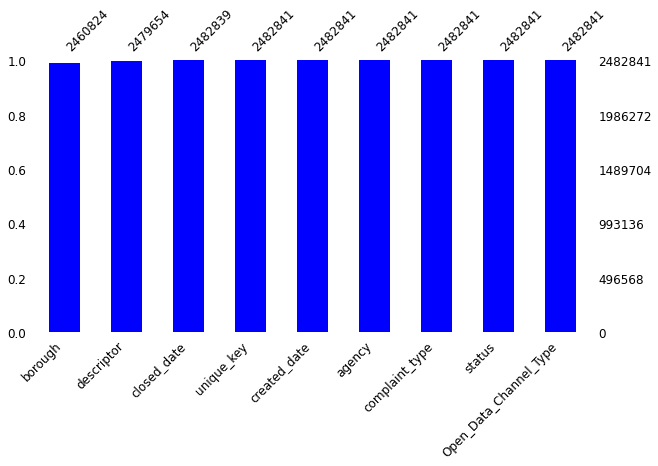

unique_key 0
created_date 0
closed_date 2
agency 0
complaint_type 0
descriptor 3187
status 0
borough 22017
Open_Data_Channel_Type 0
dtype: int64

In [0]:
# Missing Values
import missingno as msno
msno.bar(df, color="blue", sort="ascending", figsize=(10,5), fontsize=12)
df.isnull().sum()

In [0]:
# Checking for any duplicated records
duplicate= df.duplicated()
print(duplicate.sum())
df[duplicate]

0
Out[15]:

,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type


# Data Cleanup

In [0]:
# How many unique values are there in the complaint type column?
df_unique = df['complaint_type'].value_counts()
# Look at count of unique complaint types
print(df_unique.shape) 

(173,)

In [0]:
# Some of the complaint types only are logged once, so we want to remove those from the data.
# So, removed any complaint types that haven't been used more than 5 times in 1 year
value_counts = df['complaint_type'].value_counts()
to_remove = value_counts[value_counts <= 5].index 

df.drop(df[df['complaint_type'].isin(to_remove)].index, inplace = True)

df_unique = df['complaint_type'].value_counts()
print(df_unique.shape)

(155,)

In [0]:
# Creating columns month, hour, and resolution time for further analysis
from datetime import timedelta
import numpy as np

df[["created_dd_mm_yyy"]]=df.created_date.map(lambda x: x.strftime('%Y-%m-%d'))
df[["month"]]=pd.DatetimeIndex(df["created_date"]).month
df[["hour"]]=pd.DatetimeIndex(df["created_date"]).hour
df['resolution_time'] = (df['closed_date'] - df['created_date']).dt.days
df.head(5)

Out[20]:

,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type,created_dd_mm_yyy,month,hour,resolution_time
0,48538697,2020-12-31 23:59:55,2021-01-01 01:07:04,NYPD,Noise - Vehicle,Car/Truck Music,Closed,BRONX,MOBILE,2020-12-31,12,23,0.0
1,48540181,2020-12-31 23:59:28,2021-01-01 00:29:13,NYPD,Homeless Street Condition,N/A,Closed,MANHATTAN,ONLINE,2020-12-31,12,23,0.0
2,48536596,2020-12-31 23:59:28,2021-01-01 01:33:12,NYPD,Noise - Residential,Loud Music/Party,Closed,MANHATTAN,ONLINE,2020-12-31,12,23,0.0
3,48536500,2020-12-31 23:58:55,2021-01-01 00:24:54,NYPD,Noise - Residential,Loud Music/Party,Closed,BRONX,MOBILE,2020-12-31,12,23,0.0
4,48537397,2020-12-31 23:58:49,2021-01-01 01:52:20,NYPD,Blocked Driveway,No Access,Closed,BROOKLYN,MOBILE,2020-12-31,12,23,0.0


In [0]:
# An array of unique complaint types to see the variety of what these look like
complaints=df['complaint_type'].unique()
complaints

Out[19]: array(['Noise - Vehicle', 'Homeless Street Condition',
 'Noise - Residential', 'Blocked Driveway', 'Noise - Helicopter',
 'HEAT/HOT WATER', 'NonCompliance with Phased Reopening',
 'Illegal Fireworks', 'Lead', 'Illegal Parking',
 'Sanitation Condition', 'Noise - Commercial', 'Sewer',
 'Noise - Street/Sidewalk', 'Street Condition',
 'Mass Gathering Complaint', 'Non-Emergency Police Matter',
 'Street Sign - Damaged', 'Street Sign - Dangling',
 'Abandoned Vehicle', 'Consumer Complaint', 'Drug Activity',
 'Noise - House of Worship', 'Traffic Signal Condition',
 'Water System', 'Noise', 'UNSANITARY CONDITION', 'Rodent',
 'PLUMBING', 'Sidewalk Condition', 'APPLIANCE', 'Drinking',
 'Street Light Condition', 'Water Quality',
 'Emergency Response Team (ERT)', 'WATER LEAK', 'Building/Use',
 'General Construction/Plumbing', 'GENERAL', 'Elevator', 'Traffic',
 'ELECTRIC', 'PAINT/PLASTER', 'Lost Property', 'Animal-Abuse',
 'Indoor Air Quality', 'DOOR/WINDOW', 'Noise - Park',
 'Missed Collection (All Materials)', 'Broken Parking Meter',
 'Panhandling', 'Air Quality', 'FLOORING/STAIRS',
 'Bus Stop Shelter Complaint', 'Dirty Conditions', 'Curb Condition',
 'Outdoor Dining', 'Highway Condition', 'Maintenance or Facility',
 'Illegal Tree Damage', 'Damaged Tree', 'Boilers',
 'Highway Sign - Missing', 'Vending', 'Overgrown Tree/Branches',
 'Drinking Water', 'Plumbing',
 'Private or Charter School Reopening', 'Graffiti',
 'Homeless Person Assistance',
 'COVID-19 Non-essential Construction',
 'Special Projects Inspection Team (SPIT)',
 'Unsanitary Pigeon Condition', 'Taxi Complaint',
 'Violation of Park Rules', 'SAFETY', 'Asbestos',
 'Animal in a Park', 'Urinating in Public', 'Derelict Bicycle',
 'Root/Sewer/Sidewalk Condition', 'For Hire Vehicle Complaint',
 'Indoor Sewage', 'Dead/Dying Tree', 'ELEVATOR',
 'Bike Rack Condition', 'Hazardous Materials', 'Derelict Vehicles',
 'Street Sign - Missing', 'Water Conservation',
 'Unsanitary Animal Pvt Property', 'DEP Street Condition',
 'Ferry Complaint', 'Food Poisoning',
 'Investigations and Discipline (IAD)', 'Other Enforcement',
 'Taxi Report', 'Bike/Roller/Skate Chronic',
 'Home Delivered Meal - Missed Delivery', 'Unleashed Dog',
 'Taxi Compliment', 'Electrical', 'Snow', 'BEST/Site Safety',
 'Illegal Animal Kept as Pet', 'Unsanitary Animal Facility',
 'Bridge Condition', 'Wood Pile Remaining',
 'For Hire Vehicle Report', 'Ferry Inquiry',
 'Recycling Enforcement', 'OUTSIDE BUILDING',
 'Beach/Pool/Sauna Complaint', 'Uprooted Stump', 'Industrial Waste',
 'Scaffold Safety', 'Disorderly Youth', 'New Tree Request',
 'Highway Sign - Damaged', 'Bus Stop Shelter Placement',
 'Public Payphone Complaint', 'Borough Office', 'Squeegee', 'Mold',
 'Highway Sign - Dangling', 'Cranes and Derricks',
 'School Maintenance', 'Vacant Lot', 'Pet Shop', 'LinkNYC',
 'X-Ray Machine/Equipment', 'Illegal Animal Sold', 'Mosquitoes',
 'Building Marshals office', 'Non-Residential Heat', 'Plant',
 'Radioactive Material', 'Bottled Water', 'Posting Advertisement',
 'Cooling Tower', 'Animal Facility - No Permit',
 'Special Natural Area District (SNAD)', 'Green Taxi Report',
 'Public Toilet', 'Overflowing Litter Baskets', 'Standing Water',
 'Snow Removal', 'Food Establishment', 'Day Care',
 'Building Condition', 'Lifeguard', 'Poison Ivy',
 'Homeless Encampment', 'Smoking', 'Home Delivered Meal Complaint'],
 dtype=object)

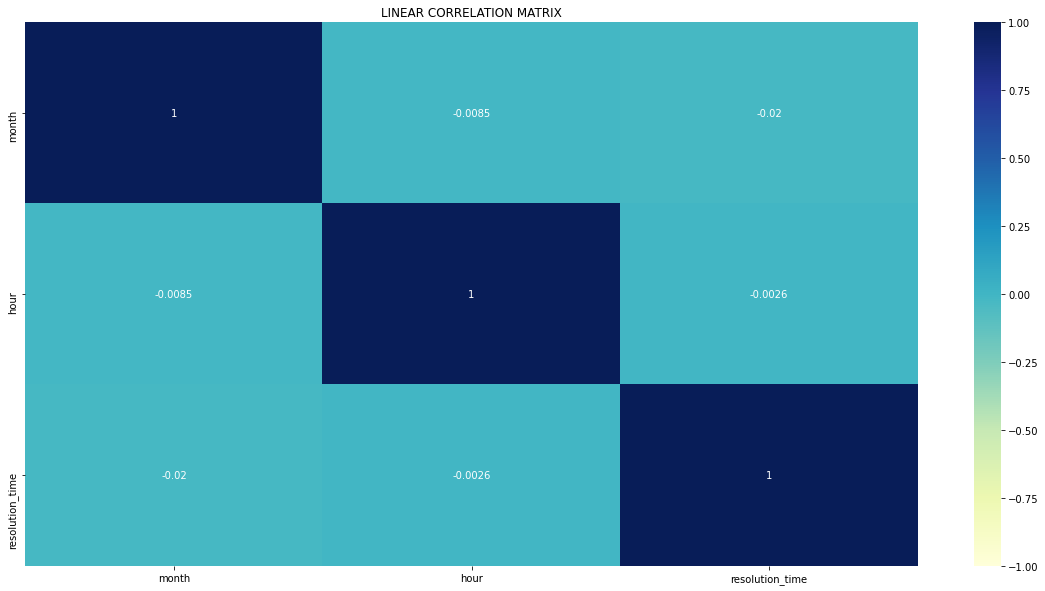

In [0]:
# Plot linear correlation matrix to find relation between the variables
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

A value close to 0(positive or negative) indicates the absence of any correlation between the two variables, and hence those features are independent of each other. So from the above visualization, we can see that value of one variable hasn't affected the other.

# Visualizations

In [0]:
# Days with highest number of complaints logged
print("Days with highest number of complaints")
df.created_dd_mm_yyy.value_counts().nlargest(10)

Days with highest number of complaints
Out[22]: 2020-08-04 18924
2020-08-05 16054
2020-07-05 15868
2020-07-04 15244
2020-06-20 14945
2020-06-21 14766
2020-06-28 12659
2020-06-27 11854
2020-08-09 11618
2020-08-01 11415
Name: created_dd_mm_yyy, dtype: int64

In [0]:
# Days with lowest number of complaints logged
print("Days with lowest number of complaints")
df.created_dd_mm_yyy.value_counts().nsmallest(10)

Days with lowest number of complaints
Out[23]: 2020-03-29 3261
2020-03-28 3366
2020-04-18 3666
2020-04-26 3782
2020-03-22 3823
2020-04-05 3862
2020-04-04 3945
2020-03-26 4009
2020-04-03 4028
2020-01-19 4032
Name: created_dd_mm_yyy, dtype: int64

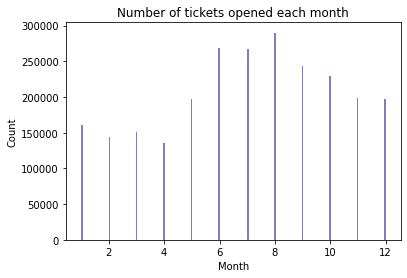

In [0]:
# Histogram to visualize most repeated month
num_bins = 200
data_value=df['month']
plt.hist(data_value, num_bins, facecolor='navy', alpha=0.5)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of tickets opened each month")
plt.show()

From the above visualization, it looks like NYC received highest requests in the summer, specifically month 2020-8

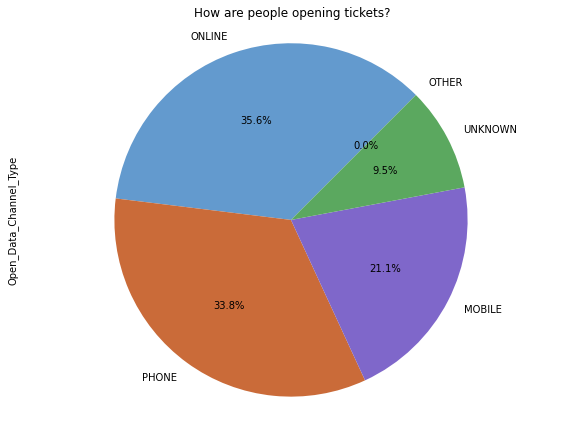

In [0]:
# How are people opening tickets?
import matplotlib as mpl
from matplotlib import pyplot as plt

colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df['Open_Data_Channel_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
plt.axis('equal')
plt.title('How are people opening tickets?')
plt.tight_layout()
plt.show()

35.6% of the requests were submitted online.

## Borough Visualizations

In [0]:
# Neighborhood with most complaints:
df.borough.value_counts().nlargest(10)

Out[26]: BROOKLYN 701158
BRONX 572944
QUEENS 568660
MANHATTAN 502851
STATEN ISLAND 103038
Unspecified 12124
Name: borough, dtype: int64

Out[27]:

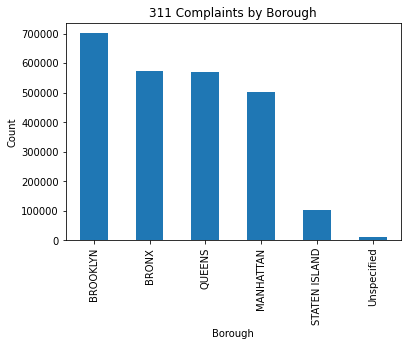

Text(0, 0.5, 'Count')

In [0]:
# Bar graph complaints by borough
ax1=df.borough.value_counts().plot(kind='bar', title= "311 Complaints by Borough")
ax1.set_xlabel("Borough")
ax1.set_ylabel("Count")

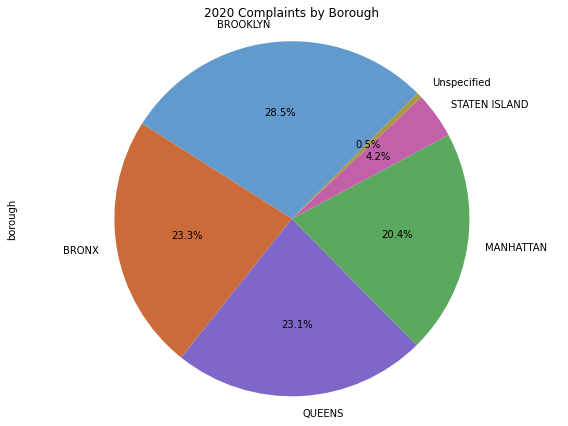

In [0]:
# Graph to see a value count by borough
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df['borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
plt.axis('equal')
plt.title('2020 Complaints by Borough')
plt.tight_layout()
plt.show()

## Complaint Type Visualizations

In [0]:
# Top Complaints
df.complaint_type.value_counts().nlargest(10)

Out[29]: Noise - Residential 407045
Noise - Street/Sidewalk 206709
Illegal Parking 194275
HEAT/HOT WATER 164597
Blocked Driveway 116751
Non-Emergency Police Matter 83936
Noise - Vehicle 81191
UNSANITARY CONDITION 61572
Damaged Tree 57571
NonCompliance with Phased Reopening 51996
Name: complaint_type, dtype: int64

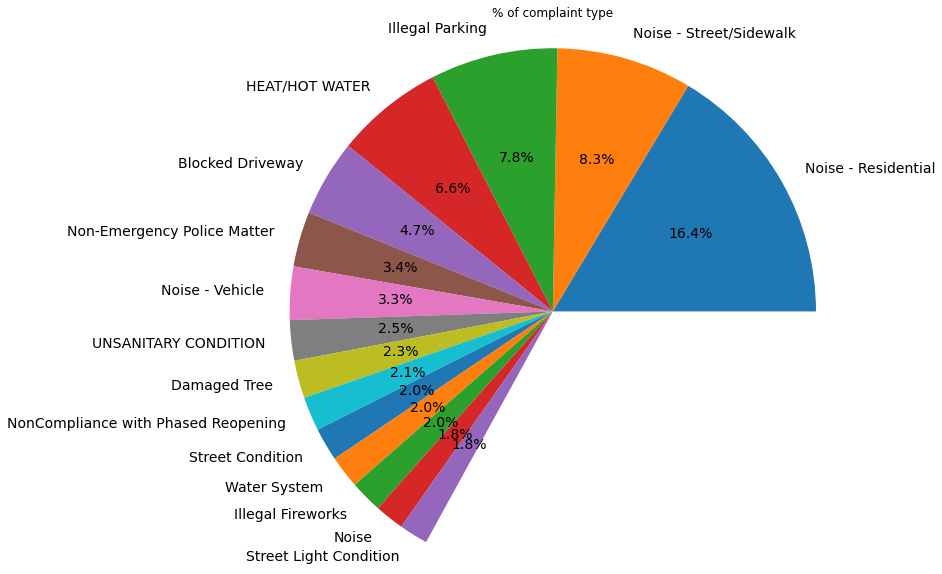

In [0]:
# Find percent of each complaint type
df_complaint = df['complaint_type'].value_counts()[:15].sort_values(ascending=False) / len(df)
sizes = df_complaint.values.tolist()
labels = df_complaint.index.values.tolist()

# Pie chart for complaint type
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.title("% of complaint type")
plt.show()

Out[31]:

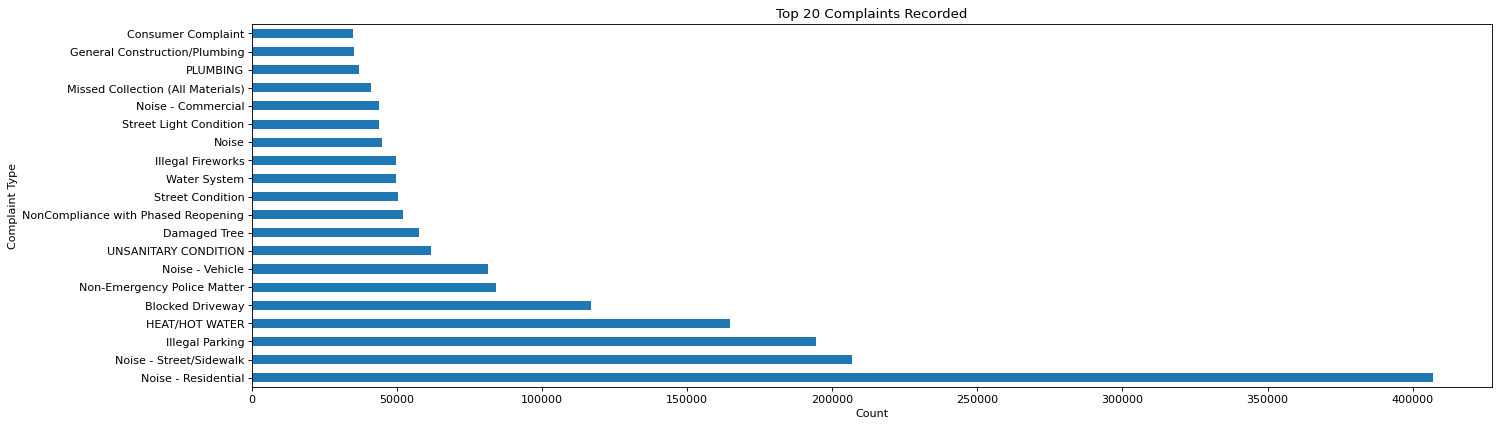

Text(0, 0.5, 'Complaint Type')

In [0]:
# Graph to see top complaint types
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
ax=df.complaint_type.value_counts().nlargest(20).plot(kind='barh', title="Top 20 Complaints Recorded")
ax.set_xlabel("Count")
ax.set_ylabel("Complaint Type")

Top 50 Complaints

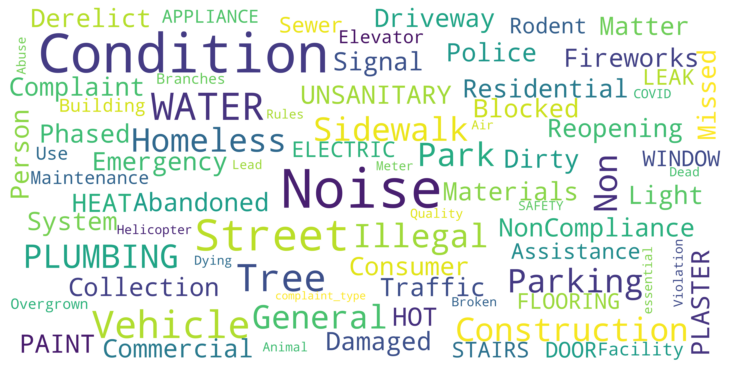

In [0]:
# WordCloud libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Group by complaint_type and count the frequency of unique keys
total=df.groupby(["complaint_type"],as_index=False).agg({"unique_key": "count"})
total.sample(5)

# Dataframe for WordCloud
top50=total.nlargest(50,"unique_key")

# Select text for WordCloud
text = top50["complaint_type"]
exclude = ["type", "dtype","Name","object"]
stopwords = STOPWORDS.update(exclude)    # STOPWORDS is a of type Set     

wc = WordCloud(scale = 15,
  max_font_size=30,
    background_color = 'white',
    stopwords = stopwords)

wc.generate(str(text))

#S how figure
fig = plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("Top 50 Complaints")
plt.show()

Residential noise complaints are the most common, lets examine what month they are most commonly reported

Out[33]:

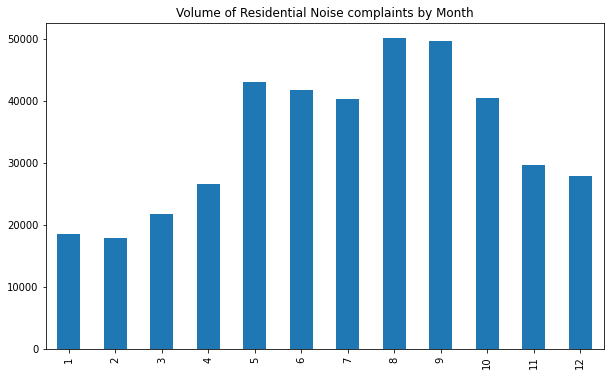

<matplotlib.axes._subplots.AxesSubplot at 0x7f1d4694e040>

In [0]:
df2= df[df['complaint_type'] == 'Noise - Residential']
df2['month'].value_counts().sort_index().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Residential Noise complaints by Month')

As we can see from the above, Residential Noise complaints are most common in the summer/warm weather months.

## Descriptor Visualizations

Top 50 Descriptors

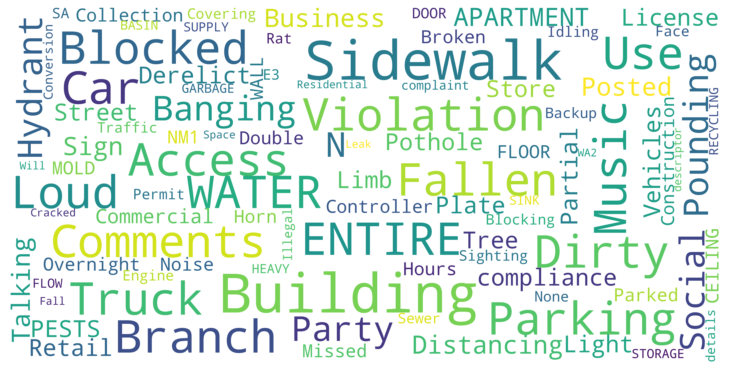

In [0]:
# Group by complaint_type and count the frequency of unique keys
total2=df.groupby(["descriptor"],as_index=False).agg({"unique_key": "count"})
total2.sample(5)

# Dataframe for WordCloud
top50_2=total2.nlargest(50,"unique_key")
top50_2.sample(5)

# Select text for WordCloud
text = top50_2["descriptor"]
exclude = ["type", "dtype","Name","object"]
#stopwords = STOPWORDS.update(exclude)    # STOPWORDS is a of type Set     

wc = WordCloud(scale = 15,
  max_font_size=30,
    background_color = 'white')

wc.generate(str(text))

#S how figure
fig = plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("Top 50 Descriptors")
plt.show()

Out[35]:

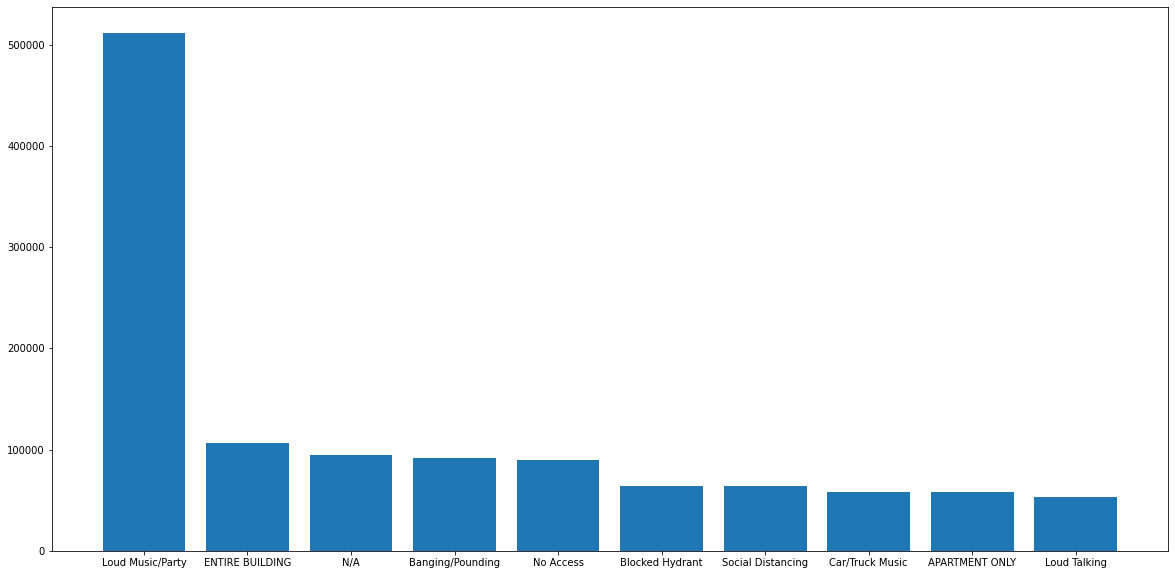

<BarContainer object of 10 artists>

In [0]:
# Highest number of descriptors
plt.figure(figsize=[20,10])
plt.bar(df['descriptor'].value_counts()[:10].index.tolist(), df['descriptor'].value_counts()[:10].values)

Out[36]:

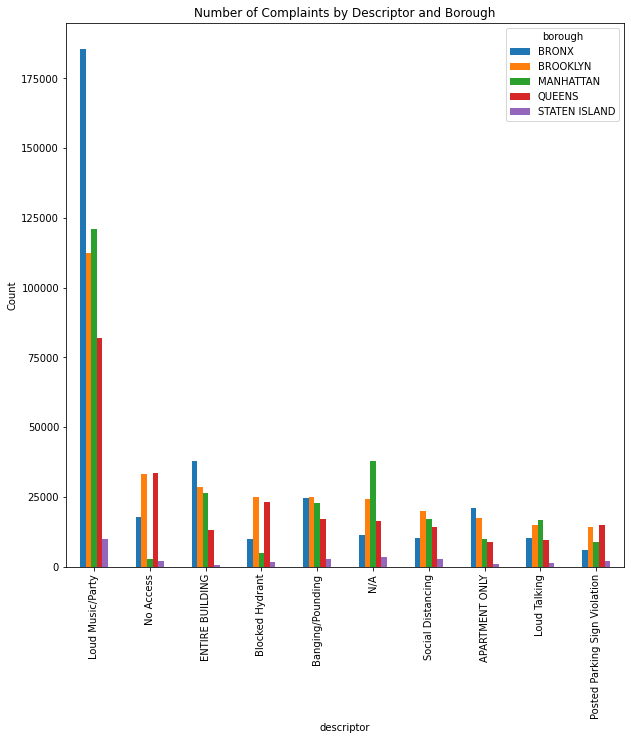

[Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Number of Complaints by Descriptor and Borough')]

In [0]:
# Now look at those same descriptors by borough
descriptor_borough = df.pivot_table(index="descriptor", columns = "borough", values = "unique_key", aggfunc = "count")
descriptor_borough = descriptor_borough.sort_values(by=['BROOKLYN'],ascending=False)
descriptor_borough.iloc[:10,:5].plot(kind="bar", figsize=(10,10)).set(title="Number of Complaints by Descriptor and Borough", ylabel = "Count")

# Source for colorful graphic:
# https://towardsdatascience.com/has-quarantine-made-you-hate-your-loud-neighbors-these-charts-certainly-imply-it-c760e999a04b

## Agency Visualizations

In [0]:
# Count of Agency
print('Count of agencies:', (df['agency'].value_counts().count()))
print('List of agencies with total count of complaints logged:\n', (df['agency'].value_counts()))

Count of agencies: 16
List of agencies with total count of complaints logged:
 NYPD 1269236
HPD 412155
DOT 188234
DEP 139768
DSNY 108019
DPR 107230
DOB 82796
MAYORâS OFFICE OF SPECIAL ENFORCEMENT 54405
DCA 34801
DOHMH 34427
DHS 26468
TLC 11261
EDC 10359
DFTA 2374
DOE 831
DOITT 428
Name: agency, dtype: int64

Out[38]: /databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0, flags=flags)

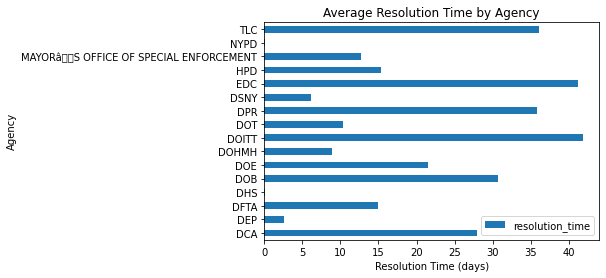

Text(0, 0.5, 'Agency')

In [0]:
# Average response time by agency (in days)
grouped_df = df.groupby("agency")
mean_df = grouped_df["resolution_time"].mean()
mean_df = mean_df.reset_index()
#print(mean_df)

figure(figsize=(20, 6), dpi=80)
ax6=mean_df.plot(kind='barh',x='agency', title="Average Resolution Time by Agency")
ax6.set_xlabel("Resolution Time (days)")
ax6.set_ylabel("Agency")

As we can see from the above graph, EDC, TLC, and DCA take the longest to close a ticket. NYPD is the quickest. 

EDC stands for **Economic Development Corporation**. These complaints include building construction complaints for piers, buildings, markets, sports facilities, etc. 

TLC stands for **Taxi & Limousine Commission**. These complaints include taxi fare, seatbelt laws, vehicle safety etc. 

DCA stands for **Department of Consumer Affairs**. The DCA helps consumers solve their problems with business. These complaints include false advertising, scams, sales to minors, warranties, etc.

In [0]:
# If we want to know specifics of resolution time (in days)
average_hour=df[['agency','resolution_time']]
average_hour=average_hour.groupby('agency').mean()
average_hour

Out[39]:

,resolution_time
agency,
DCA,27.919198
DEP,2.585814
DFTA,14.941449
DHS,0.052592
DOB,30.724516
DOE,21.486161
DOHMH,8.946147
DOITT,41.857477
DOT,10.384346


In [0]:
# What type of complaint does the Mayors office of Special Enforcement  handle?
mayor= df[df['agency'] == 'MAYORâS OFFICE OF SPECIAL ENFORCEMENT']
mayor.complaint_type.value_counts().nlargest(100)

Out[40]: NonCompliance with Phased Reopening 51747
Mass Gathering Complaint 1816
Private or Charter School Reopening 842
Name: complaint_type, dtype: int64

Looks like in 2020 the Mayors Office of Special Enforcement primarily focused on COVID and school re-openings

Out[41]: /databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0, flags=flags)

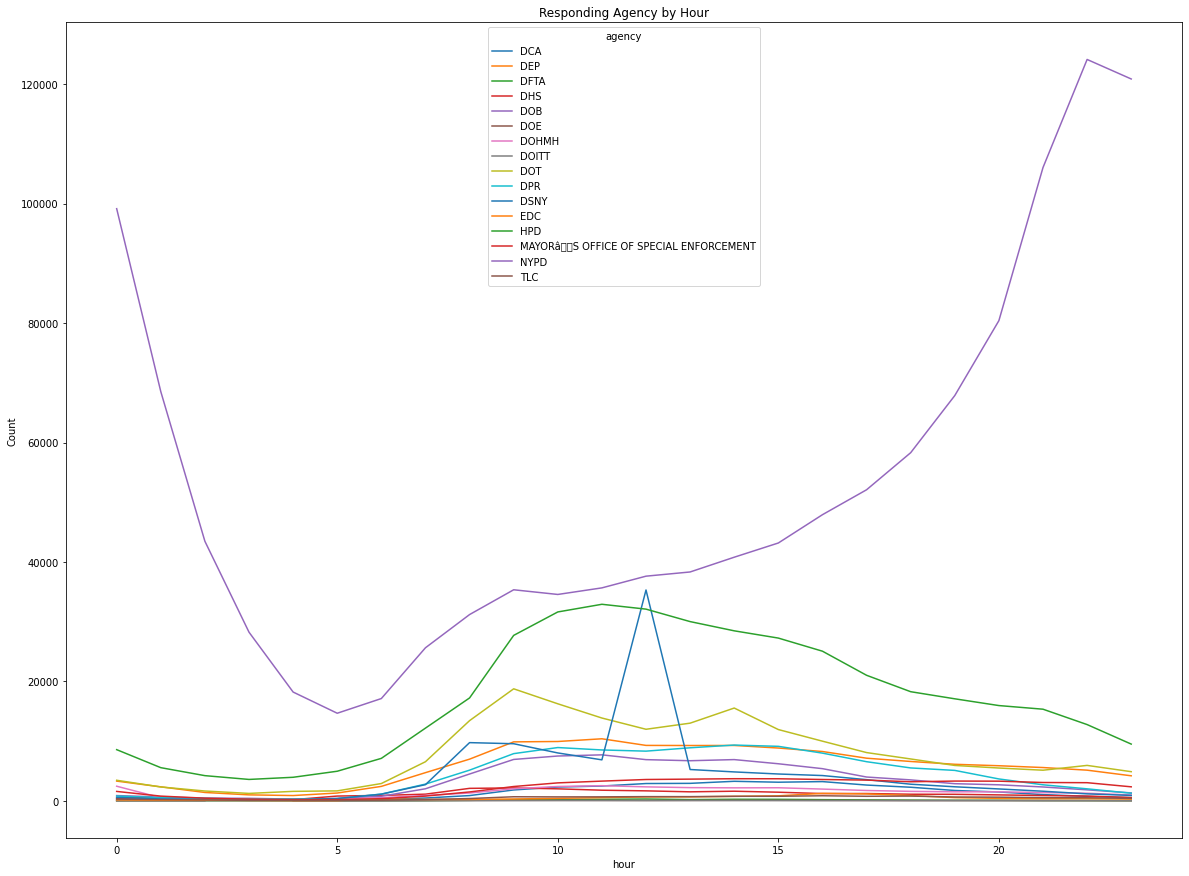

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Responding Agency by Hour')]

In [0]:
# Examine when each agency is busy during the day
agency = df.pivot_table(index="hour", columns = "agency", values = "unique_key", aggfunc = "count")
agency.plot(kind="line", figsize=(20,15)).set(title="Responding Agency by Hour", ylabel = "Count")

NYPD spikes late at night, early in the morning. HPD (Department of Housing Preservation and Development) spikes in the middle of the day, likely when the office is open and people call around lunch.

## COVID Related Complaints

*   Complaint_types  = Mass Gathering Complaint and NonCompliance with Phased Reopening
*   These complaint types are used to report things like business reopening complaints, school reopening complaints, social distancing or face covering violations, mass gathering complaints etc. There are only 4 descriptors under those 2 complaint types (Business not in compliance, Mass Gathering, Restaurant/Bar Not in Compliance, Business not allowed to be open)
*   Descriptor = Social Distancing covers any social distancing violations, but this is handled under complaint_type Non-emergency police matter
*   https://portal.311.nyc.gov/article/?kanumber=KA-03325

In [0]:
descriptors=['Business not in compliance','Mass Gathering','Restaurant/Bar Not in Compliance','Business not allowed to be open','Social Distancing']
complaints=['Private or Charter School Reopening']

In [0]:
coviddf=df[df.descriptor.isin(descriptors) | df.complaint_type.isin(complaints)]
coviddf.sample(5)

Out[43]:

,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,Open_Data_Channel_Type,created_dd_mm_yyy,month,hour,resolution_time
1477281,46634973,2020-06-26 13:10:05,2020-06-26 14:27:31,NYPD,Non-Emergency Police Matter,Social Distancing,Closed,MANHATTAN,PHONE,2020-06-26,6,13,0.0
28248,48506578,2020-12-27 11:03:41,2020-12-31 17:19:34,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,NonCompliance with Phased Reopening,Business not in compliance,Closed,QUEENS,PHONE,2020-12-27,12,11,4.0
2038270,45913678,2020-03-29 11:11:51,2020-03-29 13:21:57,NYPD,Non-Emergency Police Matter,Social Distancing,Closed,STATEN ISLAND,PHONE,2020-03-29,3,11,0.0
1641484,46425337,2020-06-09 15:35:47,2020-06-10 16:11:45,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,NonCompliance with Phased Reopening,Business not allowed to be open,Closed,BROOKLYN,ONLINE,2020-06-09,6,15,1.0
620377,47747966,2020-10-01 15:17:15,2020-10-30 17:50:26,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,NonCompliance with Phased Reopening,Business not in compliance,Closed,BRONX,ONLINE,2020-10-01,10,15,29.0


Complaint type "Private or Charter School Reopening" does not use any descriptors. Those show up as N/A in the descriptor field.

In [0]:
school_open=df[df['complaint_type'] == 'Private or Charter School Reopening']
school_open.descriptor.value_counts().nlargest(100)

Out[44]: N/A 842
Name: descriptor, dtype: int64

Out[45]:

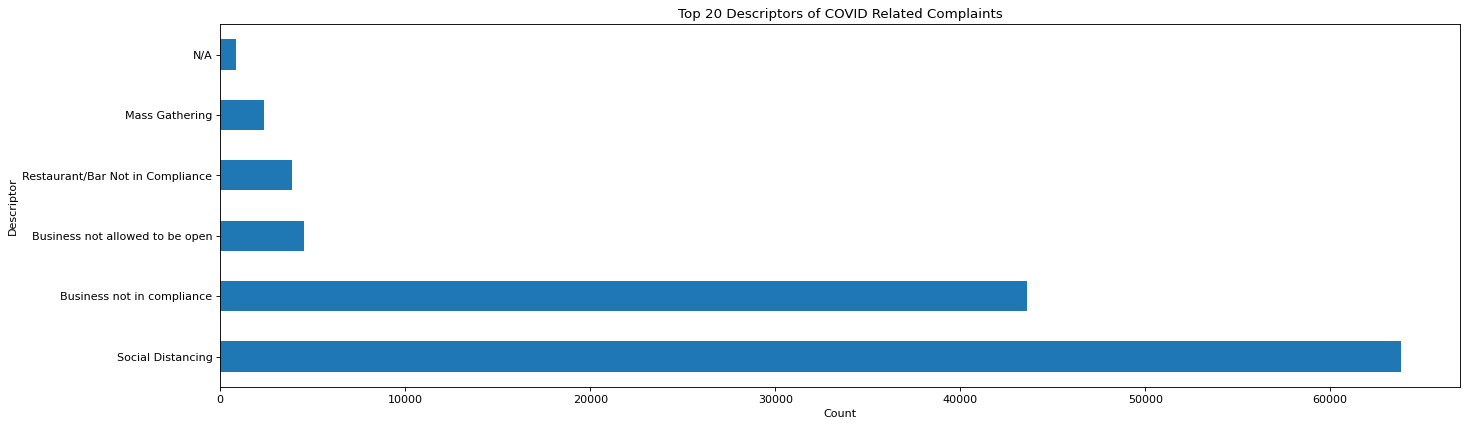

Text(0, 0.5, 'Descriptor')

In [0]:
# Now that we've only pulled COVID related complaint types, lets look at the most common descriptors
figure(figsize=(20, 6), dpi=80)
ax4=coviddf.descriptor.value_counts().nlargest(20).plot(kind='barh', title="Top 20 Descriptors of COVID Related Complaints")
ax4.set_xlabel("Count")
ax4.set_ylabel("Descriptor")

Out[46]:

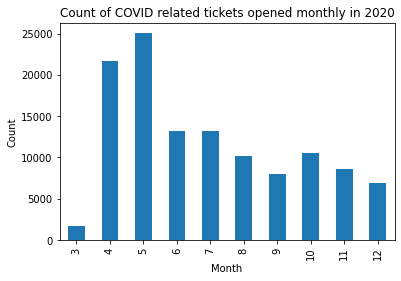

Text(0, 0.5, 'Count')

In [0]:
# Lets plot the COVID complaints over the course of 2020
df_ctype_by_month = coviddf.month.value_counts()
df_ctype_by_month.head(12)

ax5=coviddf['month'].value_counts().sort_index().plot(kind='bar', title="Count of COVID related tickets opened monthly in 2020")
ax5.set_xlabel("Month")
ax5.set_ylabel("Count")

Out[47]:

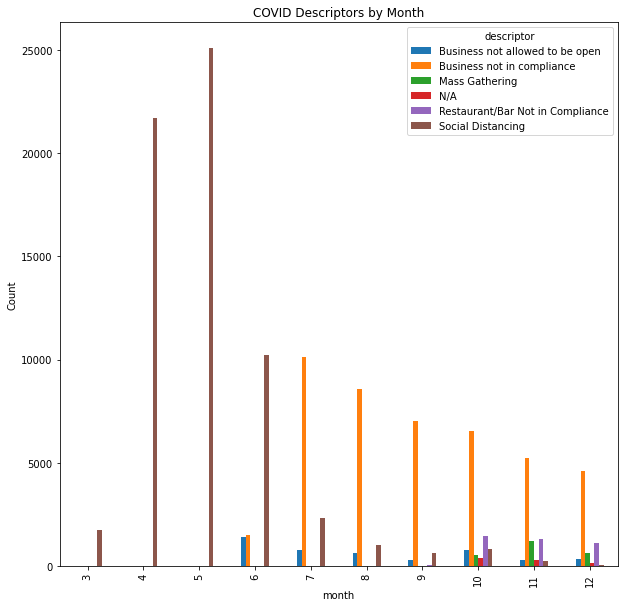

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'COVID Descriptors by Month')]

In [0]:
# Lets plot the descriptors over the course of 2020
coviddf2 = coviddf.pivot_table(index="month", columns = "descriptor", values = "unique_key", aggfunc = "count")
coviddf2.plot(kind="bar", figsize=(10,10)).set(title="COVID Descriptors by Month", ylabel = "Count")

When things started to shut down in March 2020, it looks like the only NYC311 service complaint you could log related to COVID was a Social Distancing complaint. By June, the 311 service was allowing business and mass gathering related COVID complaints.

Out[48]:

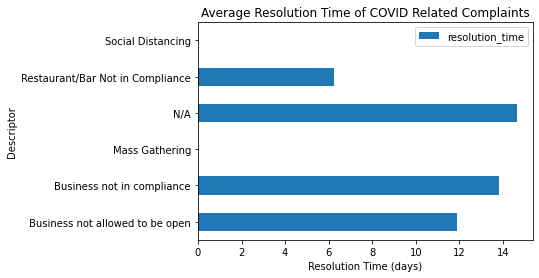

Text(0, 0.5, 'Descriptor')

In [0]:
# What are these complaint type (COVID related) resolution_time (in days)?
covidgrouped_df = coviddf.groupby("descriptor")
covidmean_df = covidgrouped_df["resolution_time"].mean()
covidmean_df = covidmean_df.reset_index()

figure(figsize=(20, 6), dpi=80)
ax5=covidmean_df.plot(kind='barh',x='descriptor', title="Average Resolution Time of COVID Related Complaints")
ax5.set_xlabel("Resolution Time (days)")
ax5.set_ylabel("Descriptor")

Out[49]:

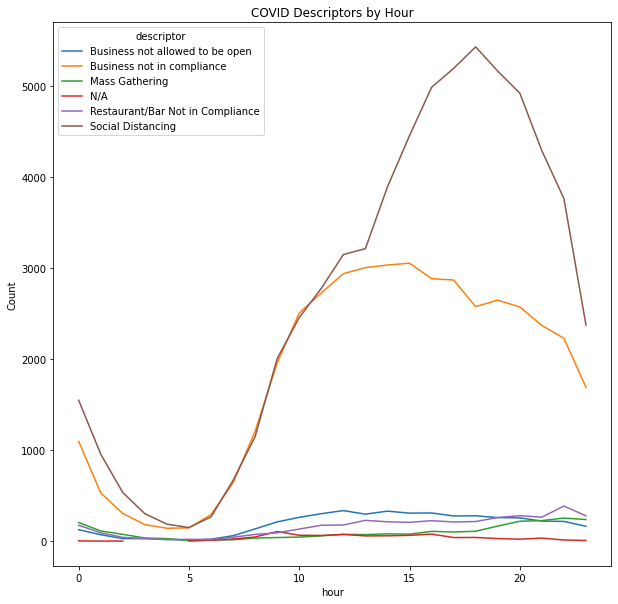

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'COVID Descriptors by Hour')]

In [0]:
# What time of day are COVID complaints being called in?
coviddf3 = coviddf.pivot_table(index="hour", columns = "descriptor", values = "unique_key", aggfunc = "count")
coviddf3.plot(kind="line", figsize=(10,10)).set(title="COVID Descriptors by Hour", ylabel = "Count")

Out[50]: /databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0, flags=flags)

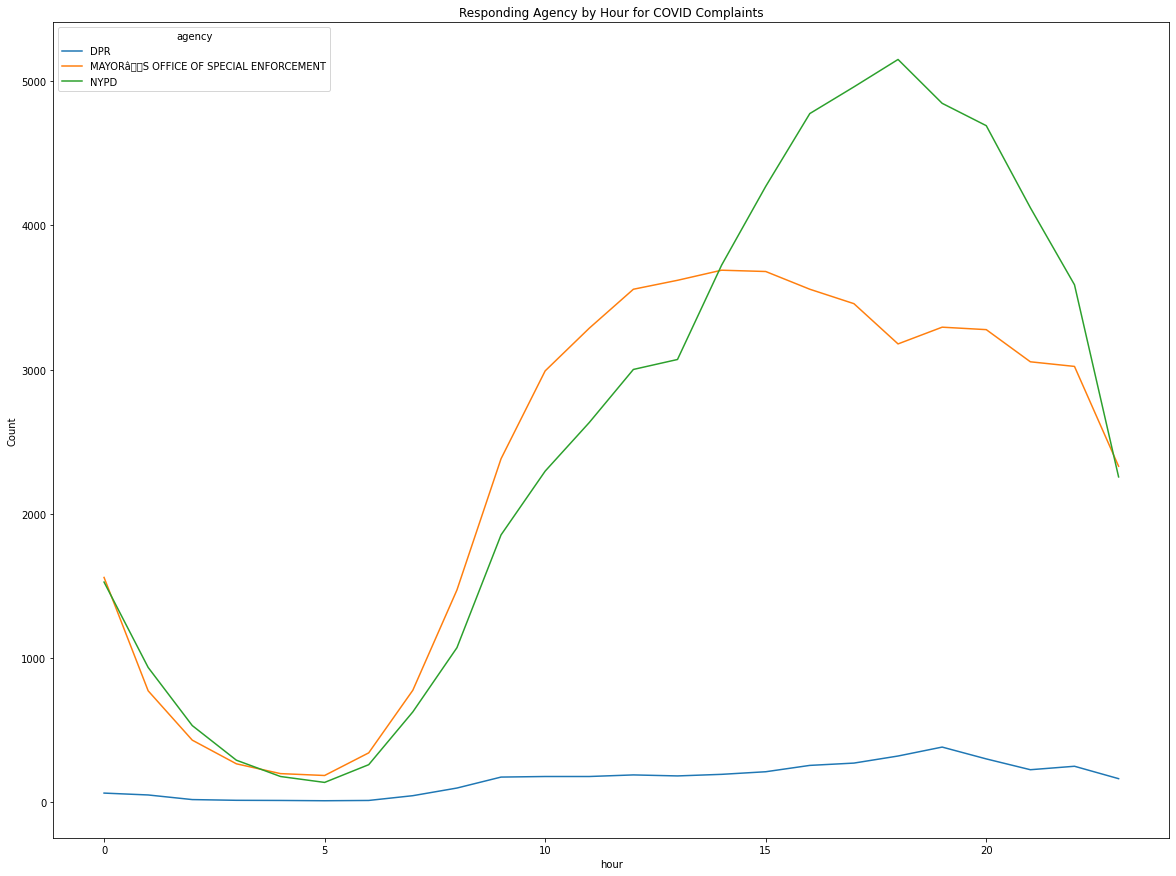

[Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Responding Agency by Hour for COVID Complaints')]

In [0]:
# Same idea as above, but what time of day are calls being called in grouped by agency 
agency2 = coviddf.pivot_table(index="hour", columns = "agency", values = "unique_key", aggfunc = "count")
agency2.plot(kind="line", figsize=(20,15)).set(title="Responding Agency by Hour for COVID Complaints", ylabel = "Count")

In [0]:
# Average resolution time and hour called in
mean=coviddf[['descriptor','resolution_time']]
mean=mean.groupby('descriptor').mean()
mean

Out[51]:

,resolution_time
descriptor,
Business not allowed to be open,11.902514
Business not in compliance,13.822337
Mass Gathering,0.000418
N/A,14.635392
Restaurant/Bar Not in Compliance,6.250713
Social Distancing,0.010903


Peak time to call in social distancing complaint is around 5-6pm. Restaurant/bar complaints peak late at night. Small spike in calls about schools being reopened happens first thing in the morning.

Out[52]: /databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
 font.set_text(s, 0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
 font.set_text(s, 0, flags=flags)

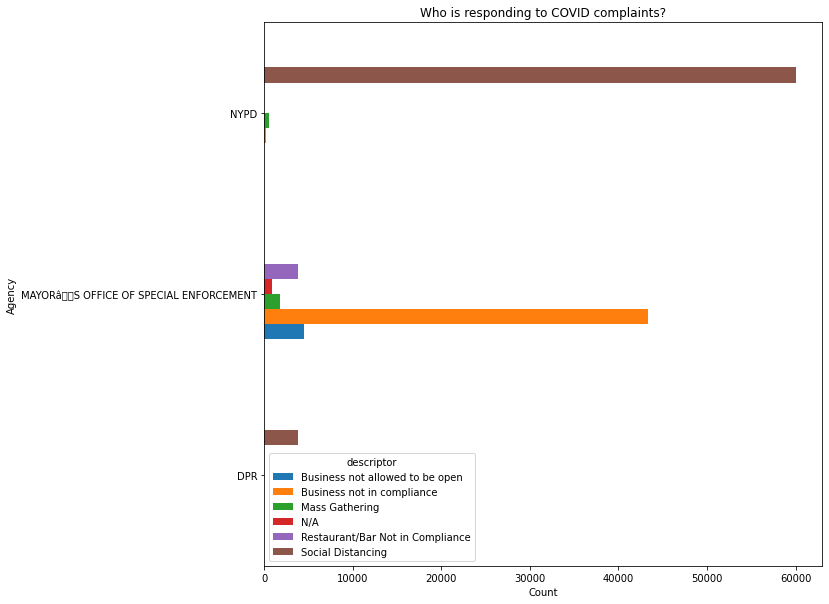

[Text(0, 0.5, 'Agency'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Who is responding to COVID complaints?')]

In [0]:
# Which agency handled which complaint types or descriptors?
coviddf4 = coviddf.pivot_table(index="agency", columns = "descriptor", values = "unique_key", aggfunc = "count")
coviddf4.plot(kind="barh", figsize=(10,10)).set(title="Who is responding to COVID complaints?", ylabel = "Agency",xlabel="Count")

DPR = Department of Parks and Recreation

Out[53]:

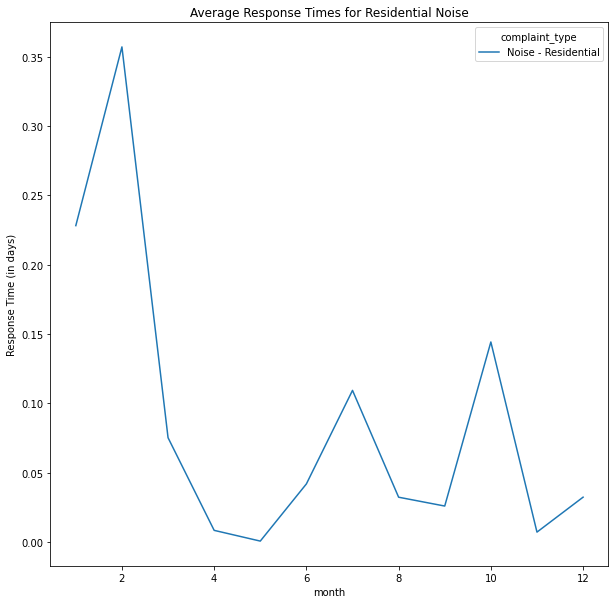

[Text(0, 0.5, 'Response Time (in days)'),
 Text(0.5, 1.0, 'Average Response Times for Residential Noise')]

In [0]:
# How has COVID-19 changes response times?
# Examine average response times pre and post March 2020 in our top complaint, Noise - Residential
coviddf4=df[df['complaint_type'] == 'Noise - Residential']
covid_time = coviddf4.pivot_table(index="month", columns = "complaint_type", values = "resolution_time", aggfunc = np.mean)
covid_time.plot(kind="line", figsize=(10,10)).set(title="Average Response Times for Residential Noise", ylabel = "Response Time (in days)")

Out[54]:

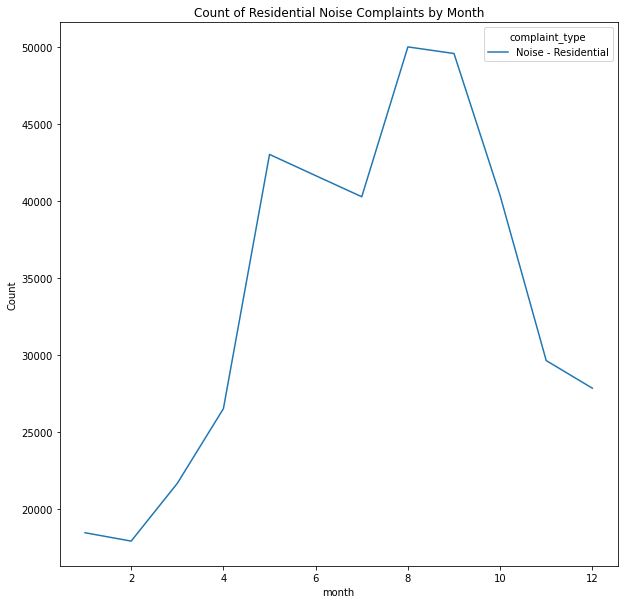

[Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count of Residential Noise Complaints by Month')]

In [0]:
# Does the above graph make sense with the spikes in number of residential noise calls and in the context of the pandemic shutting things down in March?
noise = coviddf4.pivot_table(index="month", columns = "complaint_type", values = "unique_key", aggfunc = "count")
noise.plot(kind="line", figsize=(10,10)).set(title="Count of Residential Noise Complaints by Month", ylabel = "Count")

A more accurate way to do this and an idea for future research would be to compare trends YoY. Just looking at 2020 data does not accurately allow us to answer "how has COVID-19 changed response times?" As we saw at the beginning of the project, the count of complaints logged peaks in the summer so a YoY comparison would be necessary to draw any conclusions.

Sources:

*   https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
*  https://dev.socrata.com/docs/endpoints.html
*   https://portal.311.nyc.gov/report-problems/
*   https://towardsdatascience.com/has-quarantine-made-you-hate-your-loud-neighbors-these-charts-certainly-imply-it-c760e999a04b
*   https://towardsdatascience.com/analyzing-and-modelling-nyc-311-service-requests-eb6a9c9adc7c